In [15]:
import yfinance as yf
import pandas as pd
import numpy as np

In [14]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [89]:
amazon = yf.download('INTC', start='2021-11-01', end='2022-11-01')
amazon.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-11-01,49.400002,49.599998,49.000000,49.549999,47.329285,28013700
2021-11-02,49.610001,49.900002,49.230000,49.860001,47.625397,27193300
2021-11-03,49.930000,50.450001,49.709999,50.389999,48.131638,23962100
2021-11-04,50.240002,50.349998,49.730000,50.310001,48.389412,24806000
2021-11-05,50.549999,51.580002,50.540001,50.919998,48.976120,36816200


In [90]:
amazon ['Open-Close'] = amazon .Open - amazon .Close
amazon ['High-Low'] = amazon .High - amazon .Low
X = amazon [['Open-Close', 'High-Low']]
X.head()

,Open-Close,High-Low
Date,,
2021-11-01,-0.149998,0.599998
2021-11-02,-0.250000,0.670002
2021-11-03,-0.459999,0.740002
2021-11-04,-0.070000,0.619999
2021-11-05,-0.369999,1.040001


In [91]:
y = np.where(amazon ['Close'].shift(-1) > amazon ['Close'], 1, -1)
y

array([ 1,  1, -1,  1,  1, -1, -1, -1, -1,  1,  1, -1, -1, -1,  1, -1,  1,
       -1,  1, -1, -1,  1, -1,  1,  1, -1, -1,  1, -1, -1,  1,  1, -1, -1,
        1,  1,  1,  1, -1,  1, -1, -1,  1, -1,  1,  1, -1,  1,  1, -1, -1,
        1, -1, -1, -1, -1, -1, -1,  1, -1, -1,  1,  1,  1, -1, -1,  1,  1,
        1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  1,  1, -1, -1,  1, -1,  1,
       -1, -1,  1, -1, -1, -1,  1,  1,  1,  1, -1,  1, -1,  1,  1, -1,  1,
       -1, -1, -1,  1, -1, -1,  1, -1, -1, -1,  1, -1,  1,  1,  1, -1, -1,
        1, -1, -1,  1, -1,  1,  1,  1, -1, -1, -1,  1, -1,  1,  1, -1,  1,
       -1, -1, -1,  1, -1,  1,  1,  1, -1, -1,  1, -1, -1,  1, -1, -1, -1,
       -1,  1,  1, -1, -1,  1, -1,  1,  1,  1, -1, -1,  1, -1,  1,  1,  1,
       -1, -1,  1, -1,  1,  1,  1,  1,  1,  1, -1, -1, -1,  1, -1, -1,  1,
       -1,  1, -1, -1, -1, -1,  1,  1,  1,  1, -1, -1,  1, -1, -1,  1, -1,
        1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1, -1, -1, -1,  1,  1,
       -1, -1, -1, -1, -1

In [92]:
split_percentage = 0.8
split = int(split_percentage * len(amazon ))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [93]:
classifier = SVC().fit(X_train, y_train)

In [94]:
amazon ['Predicted_Signal'] = classifier.predict(X)
amazon ['amazon_Returns'] = amazon.Close.pct_change()
amazon ['Strategy_Returns'] = amazon.amazon_Returns * amazon .Predicted_Signal.shift(1)
amazon ['Cumulative_Returns'] = amazon ['amazon_Returns'].cumsum()
amazon ['Cumulative_Strategy_Returns'] = amazon ['Strategy_Returns'].cumsum()
amazon.head()

,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low,Predicted_Signal,amazon_Returns,Strategy_Returns,Cumulative_Returns,Cumulative_Strategy_Returns
Date,,,,,,,,,,,,,
2021-11-01,49.400002,49.599998,49.000000,49.549999,47.329285,28013700,-0.149998,0.599998,-1,NaN,NaN,NaN,NaN
2021-11-02,49.610001,49.900002,49.230000,49.860001,47.625397,27193300,-0.250000,0.670002,-1,0.006256,-0.006256,0.006256,-0.006256
2021-11-03,49.930000,50.450001,49.709999,50.389999,48.131638,23962100,-0.459999,0.740002,-1,0.010630,-0.010630,0.016886,-0.016886
2021-11-04,50.240002,50.349998,49.730000,50.310001,48.389412,24806000,-0.070000,0.619999,-1,-0.001588,0.001588,0.015298,-0.015298
2021-11-05,50.549999,51.580002,50.540001,50.919998,48.976120,36816200,-0.369999,1.040001,-1,0.012125,-0.012125,0.027423,-0.027423


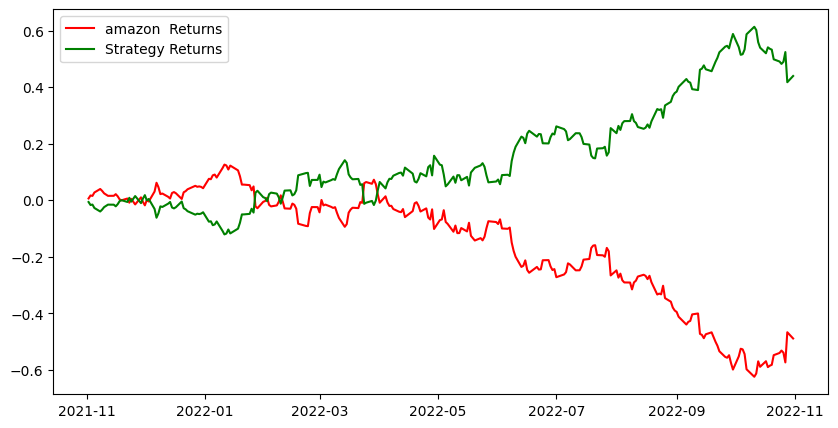

In [95]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(amazon ['Cumulative_Returns'], color='r', label = 'amazon  Returns')
plt.plot(-amazon ['Cumulative_Strategy_Returns'], color='g', label = 'Strategy Returns')
plt.legend()
plt.show()

In [84]:
# calculate accuracy
accuracy_score(y_test, amazon ['Predicted_Signal'][split:])
print("Accuracy of our SVM model is: ", accuracy_score(y_test, amazon ['Predicted_Signal'][split:])*100, "%")

Accuracy of our SVM model is:  50.98039215686274 %
